In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression

# 1. Data Acquisition

In [179]:
df = pd.read_csv("/Users/yijunshen/close.csv", index_col = 0)
df.index = pd.to_datetime(df.index, format='%Y%m%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2674 entries, 2010-01-04 to 2020-12-31
Columns: 500 entries, 000009.SZ to 688536.SH
dtypes: float64(500)
memory usage: 10.2 MB


In [17]:
df.head()

,000009.SZ,000012.SZ,000021.SZ,000027.SZ,000028.SZ,000031.SZ,000039.SZ,000046.SZ,000050.SZ,000060.SZ,...,688029.SH,688065.SH,688088.SH,688099.SH,688188.SH,688208.SH,688289.SH,688321.SH,688521.SH,688536.SH
2010-01-04,10.84,19.41,13.10,13.41,27.56,10.97,13.09,13.84,6.75,28.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,10.56,19.08,13.40,13.40,28.31,10.74,13.27,13.36,6.94,29.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,10.55,19.67,13.31,13.38,28.75,10.76,13.51,13.37,6.76,30.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,10.75,18.63,13.48,13.08,27.48,10.90,13.30,13.19,6.50,29.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,11.27,18.43,13.46,13.23,26.95,10.99,13.32,13.30,6.67,29.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Q1. Missing rate for each stock 

In [18]:
#generate missing rate
missing_rate = df[1:].isnull().sum()/df.shape[0]
missing_rate

000009.SZ    0.041137
000012.SZ    0.016829
000021.SZ    0.011593
000027.SZ    0.018699
000028.SZ    0.047494
               ...   
688208.SH    0.917726
688289.SH    0.968212
688321.SH    0.872850
688521.SH    0.965221
688536.SH    0.974196
Length: 500, dtype: float64

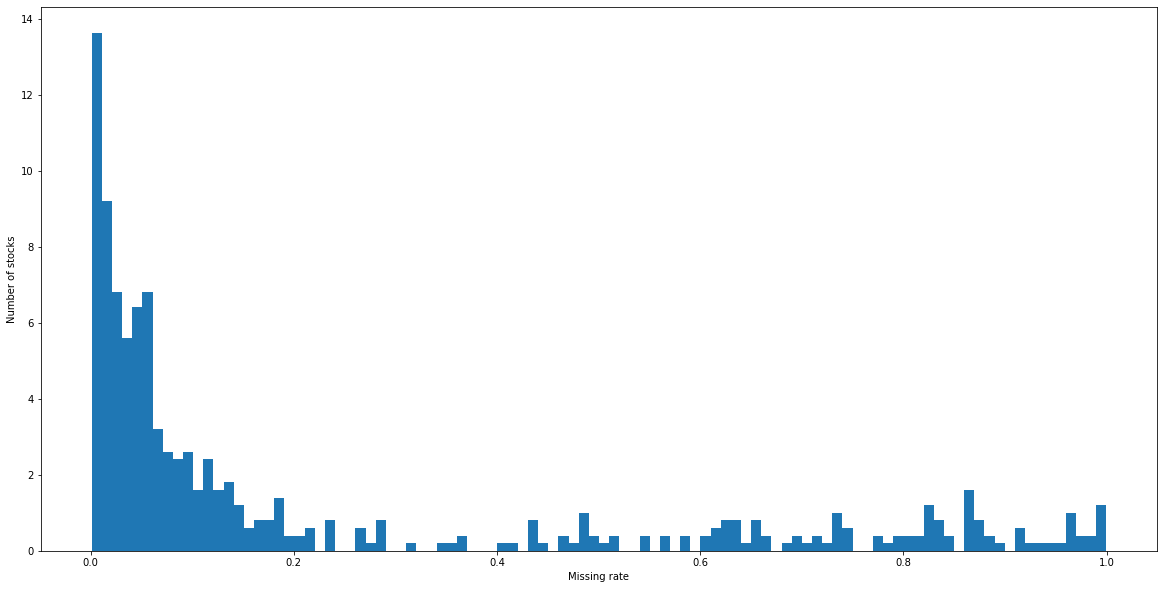

In [19]:
#plot the histogram
fig = plt.figure(figsize=(20,10))
plt.hist(missing_rate, density=True, bins=100)
plt.xlabel('Missing rate')
plt.ylabel('Number of stocks')
plt.show()

### Q2. Missing rate for each trading day

In [20]:
missing_rate_eachday = df.isnull().sum(axis = 1)/500
missing_rate_eachday = pd.DataFrame(missing_rate_eachday, columns = ['Missing_rate'], index=df.index)
missing_rate_eachday

,Missing_rate
2010-01-04,0.436
2010-01-05,0.442
2010-01-06,0.440
2010-01-07,0.434
2010-01-08,0.442
...,...
2020-12-25,0.010
2020-12-28,0.012
2020-12-29,0.010
2020-12-30,0.012


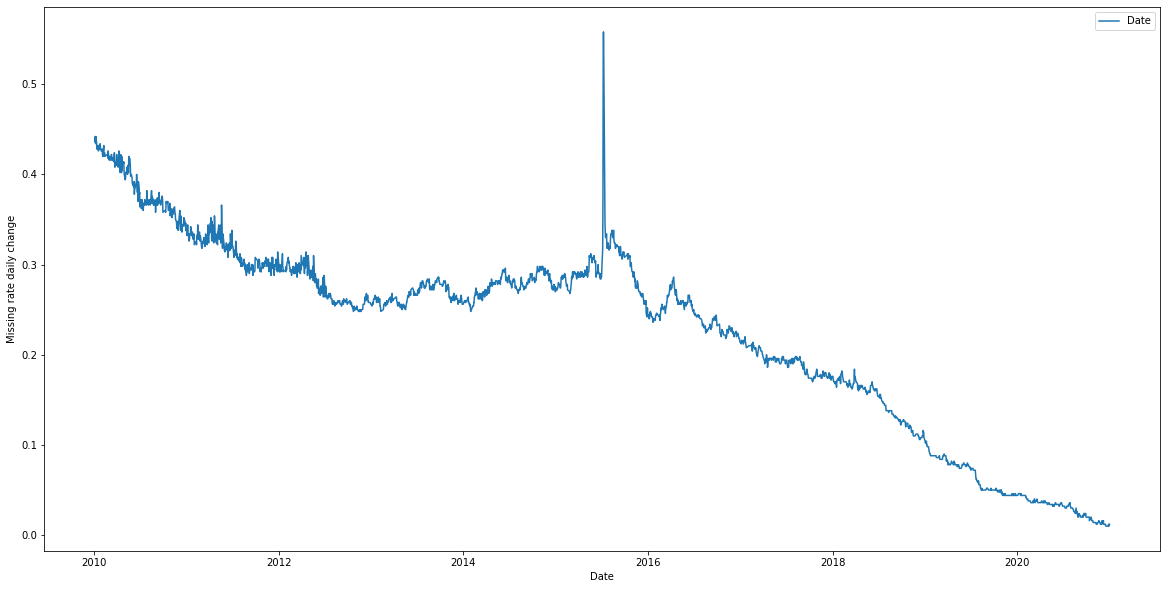

In [21]:
fig = plt.figure(figsize=(20,10))
plt.plot(missing_rate_eachday,label='Date')
plt.xlabel('Date')
plt.ylabel('Missing rate daily change')
plt.legend()

# 2. Basic Strategy

### 2.1. Determine Strategy Weights

In [191]:
#generate 22-day moving average price of stock and 5-day moving average price of stock
#and generate signal using def function
def SW_signalgenerator(df, ma1, ma2):
    #ma2 is the ma with more days
    #for the input ma1, ma2, we just need to plug in number of days we need for each moving average
    ma1 = df.rolling(ma1).mean().dropna(axis = 0, how ='all')
    ma2 = df.rolling(ma2).mean().dropna(axis = 0, how = 'all')
    signal = (np.log(ma2)-np.log(ma1)).dropna(axis = 0, how = 'all')
    #normalize signal
    norm_sign = 0.02*((signal.T - signal.mean(axis = 1))/signal.std(axis=1)).T
    return norm_sign

In [192]:
norm_sign = SW_signalgenerator(df, 5, 22)
norm_sign

,000009.SZ,000012.SZ,000021.SZ,000027.SZ,000028.SZ,000031.SZ,000039.SZ,000046.SZ,000050.SZ,000060.SZ,...,688029.SH,688065.SH,688088.SH,688099.SH,688188.SH,688208.SH,688289.SH,688321.SH,688521.SH,688536.SH
2010-02-02,-0.002909,-0.001858,0.004089,-0.000981,-0.044177,0.013109,-0.012559,-0.006464,-0.006822,0.039905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-03,-0.004131,-0.003074,0.005916,-0.003084,-0.047806,0.010980,-0.015025,-0.008957,-0.009744,0.037082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-04,-0.010157,-0.001923,0.008865,-0.003634,-0.046599,0.008418,-0.015752,-0.009722,-0.015833,0.030980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-05,-0.015333,-0.000912,0.012307,-0.004790,-0.043074,0.005993,-0.015294,-0.010377,-0.017172,0.025633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-08,-0.017936,-0.001128,0.012307,-0.005816,-0.036697,0.006069,-0.015249,NaN,-0.022609,0.023156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,-0.021164,-0.029022,0.011818,-0.020966,0.013231,0.011702,-0.004839,0.009970,0.003582,-0.003990,...,-0.011573,0.011911,-0.008802,-0.016942,-0.005540,0.007277,-0.023442,0.024722,0.031327,-0.008360
2020-12-28,-0.020286,-0.030524,0.016267,-0.029868,0.010553,0.011844,-0.008037,0.015832,0.004200,-0.005574,...,-0.014619,0.012751,-0.002156,-0.007964,-0.007808,0.004545,-0.025220,0.024594,0.035923,-0.003988
2020-12-29,-0.019678,-0.030505,0.019253,-0.035091,0.010955,0.012191,-0.008987,0.020849,0.004946,-0.007327,...,-0.015583,0.014918,0.000536,-0.002601,-0.012652,0.007980,-0.022680,0.026636,0.038672,0.001448
2020-12-30,-0.018933,-0.029751,0.022602,-0.039357,0.011798,0.012336,-0.009554,0.026097,0.005763,-0.011588,...,-0.014268,0.016824,0.003429,-0.000099,-0.012142,0.008434,-0.021555,0.028203,0.040622,0.006585


### 2.2. Backtest Strategy

In [48]:
#if choose only one stock to long and to short
max_sign_daily = norm_sign.max(axis = 1)
min_sign_daily = norm_sign.min(axis = 1)
#there is no signal before 2.2
def backtest1(df, norm_sign, date):
    r = df.pct_change().loc[date:] #2月2日之后 每只股票每天收益率

    b = pd.DataFrame(columns=['short stock','long stock', 
                              'short position', 'long position',
                              'short change','long change','return', 'net worth'],index=norm_sign.index)
    for idx in norm_sign.index:
        # sale 
        b['short stock'].loc[idx] = norm_sign.loc[idx][norm_sign.loc[idx]==norm_sign.loc[idx].max()].index[0]
        b['short position'].loc[idx] = norm_sign.loc[idx].max()
        b['short change'].loc[idx] = r[b['short stock'].loc[idx]].loc[idx]
        # buy
        b['long stock'].loc[idx] = norm_sign.loc[idx][norm_sign.loc[idx]==norm_sign.loc[idx].min()].index[0]
        b['long position'].loc[idx] = norm_sign.loc[idx].min()
        b['long change'].loc[idx] = r[b['long stock'].loc[idx]].loc[idx]
        # daily return
        b['return'] = b['short change']*b['short position'] - b['long position']*b['long change']
    b['net worth'] = (b['return']+1).cumprod()
    
    return b

backtest1(df, norm_sign, '2010-02-02')    

,short stock,long stock,short position,long position,short change,long change,return,net worth
2010-02-02,600546.SH,000998.SZ,0.051141,-0.068733,0.019442,0.025475,0.002745,1.002745
2010-02-03,300009.SZ,000998.SZ,0.05056,-0.069549,-0.013708,-0.014002,-0.001667,1.001074
2010-02-04,300009.SZ,000998.SZ,0.053872,-0.0685,0.01092,0.01924,0.001906,1.002982
2010-02-05,300017.SZ,600158.SH,0.058735,-0.067786,-0.002198,-0.097872,-0.006763,0.996198
2010-02-08,300017.SZ,600158.SH,0.059473,-0.065537,0.019509,0.009434,0.001779,0.99797
...,...,...,...,...,...,...,...,...
2020-12-25,002002.SZ,600006.SH,0.056569,-0.115383,0.026936,-0.02452,-0.001305,3.260692
2020-12-28,002002.SZ,600006.SH,0.0515,-0.104033,-0.016393,0.031694,0.002453,3.26869
2020-12-29,300182.SZ,600006.SH,0.057356,-0.091545,-0.082386,-0.029661,-0.007441,3.244369
2020-12-30,002174.SZ,600316.SH,0.05582,-0.079567,0.075795,0.077083,0.010364,3.277994


In [283]:
#if choose all stocks to long and short
def backtest(df, norm_sign, costBp = 0):
    r = df.pct_change()
    a = pd.DataFrame(index = norm_sign.index, columns = ['return', 'net worth'])
    cost = abs((norm_sign.shift(1)).diff())*costBp
    cost[np.isnan(cost)] = 0
    for i in a.index:
        a['return'].loc[i] = ((norm_sign.shift(1).loc[i])*r.loc[i]).sum()
    a['return']=a['return']-cost.sum(axis = 1)
    a['net worth'] = (a['return'] +1).cumprod()
    return a
        
backtest(df, norm_sign, 2.5*1e-4) 

,return,net worth
2010-02-02,0.0,1.0
2010-02-03,0.034758,1.034758
2010-02-04,-0.020611,1.01343
2010-02-05,-0.000121,1.013308
2010-02-08,0.01304,1.026521
...,...,...
2020-12-25,-0.04196,17.629371
2020-12-28,-0.036066,16.99355
2020-12-29,0.165721,19.809738
2020-12-30,-0.060614,18.608994


#### Calculating stats:

In [273]:
def annualreturn(networth):
    network = networth[-1]-1
        # annual return rate
    period = len(networth)/252
    return networth[-1]**(1/period) - 1
annualreturn(backtest(df, norm_sign)['net worth'])

0.39730098033379413

In [35]:
#sharpe ratio:
def sharpe(return_list):
    return np.sqrt(252) * (return_list.mean() - (0.05/252)) / return_list.std()

sharpe(backtest(df, norm_sign)['return'])#0.8681048380749093

0.8681048380749093

In [36]:
#volatility:
import math
def volitility(return_list):
    daily_volatility = return_list.std()
    annual_volatility = math.sqrt(252) * daily_volatility 
    return annual_volatility
volitility(backtest(df, norm_sign)['return'])#0.43802886592824686

0.43802886592824686

In [37]:
#max Drawdown:
def maxdrawdown(return_list):
    """maxdrawdown"""
    maxac=np.zeros(len(return_list))
    b=return_list[0]
    for i in range(0,len(return_list)): #Goes over the list, when larger than the previous value, set b
        if return_list[i]>b:
            b=return_list[i]
        maxac[i]=b
    #print(maxac)
    i=np.argmax((maxac-return_list)/maxac) #stop position
    if i == 0:
        return 0
    j = np.argmax(return_list[:i])  #start position
    maxdd = (return_list[j] - return_list[i]) / (return_list[j])
    return maxdd
maxdrawdown(backtest(df, norm_sign)['net worth'])
#0.5600436015543598

0.5600436015543598

### 2.3. Add Transaction Costs

In [309]:
#since we have already added the transaction cost as a factor, we just set the costBp to 0.0005 and check the result
transaction_df = backtest(df, norm_sign, costBp = 0.00025)

In [275]:
transaction_df

,return,net worth
2010-02-02,0.0,1.0
2010-02-03,0.034758,1.034758
2010-02-04,-0.020777,1.013259
2010-02-05,-0.000286,1.012969
2010-02-08,0.012877,1.026013
...,...,...
2020-12-25,-0.042318,9.641501
2020-12-28,-0.036388,9.290669
2020-12-29,0.165404,10.827382
2020-12-30,-0.060924,10.167739


In [277]:
annualreturn(transaction_df['net worth'])

0.24567124498459414

In [278]:
sharpe(transaction_df['return'])#0.6056760340338915

0.6056760340338915

In [281]:
maxdrawdown(transaction_df['net worth'])#0.6762881857188652

0.6762881857188652

In [282]:
volitility(transaction_df['return'])#0.43808027414780876

0.43808027414780876

Text(0, 0.5, 'Return')

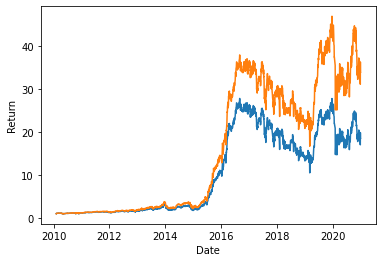

In [316]:
plt.plot(transaction_df['net worth'])
plt.plot(backtest(df, norm_sign)['net worth'])
plt.xlabel('Date')
plt.ylabel('Return')

### 3.1. Risk-Weight Portfolio

In [284]:
def risk_weight_adjustment(data,signal_df,window_size):
    #using rolling 6-month volatility of daily returns
    #window size = 120
    #Adjusted normalized signal of stock i on day j = 0.5 * normalized signal for stock i and day j / volatility of stock i.
    rolling_volatility = data.pct_change().rolling(window_size).std()*(252**0.5)
    adjusted_normalized_signal = 0.5 * signal_df / rolling_volatility
    adjusted_normalized_signal = adjusted_normalized_signal.fillna(0)
    return adjusted_normalized_signal

risk_weight = risk_weight_adjustment(df, norm_sign, 120) 
risk_weight = risk_weight.loc['2010-02-02':]#there is no data before 2010-02-02

In [285]:
risk_weight_return = backtest(df, risk_weight)

In [286]:
annualreturn(risk_weight_return['net worth'])

0.36569265501135884

In [126]:
volitility(risk_weight_return['return'])#0.4700005432213975

0.4700005432213975

In [127]:
sharpe(risk_weight_return['return'])#0.7948296214251303

0.7948296214251303

In [128]:
maxdrawdown(risk_weight_return['net worth'])#0.6591412981702156

0.6591412981702156

Add transaction cost

In [289]:
risk_weight_return_cost = backtest(df, risk_weight, costBp = 0.00025)
annualreturn(risk_weight_return_cost['net worth'])

0.27454454781134263

In [290]:
volitility(risk_weight_return_cost['return'])#0.47006760756747007

0.47006760756747007

In [291]:
sharpe(risk_weight_return_cost['return'])#0.6477752200257605

0.6477752200257605

In [292]:
maxdrawdown(risk_weight_return_cost['net worth'])#0.661296710987559

0.661296710987559

Text(0, 0.5, 'Return')

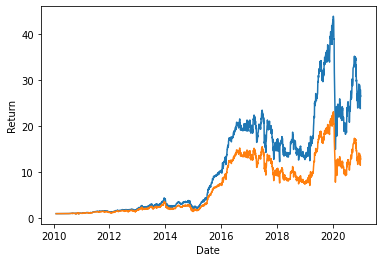

In [315]:
plt.plot(risk_weight_return['net worth'])
plt.plot(risk_weight_return_cost['net worth'])
plt.xlabel('Date')
plt.ylabel('Return')

### 3.2. Neutralize by Volatility Bucket

In [293]:
def bucketgenerator(df):
    volatility_list = df.pct_change().std().dropna().sort_values()*math.sqrt(252)

    Bucket_size = int(volatility_list.shape[0]/5)

    Bucket_1 = df[volatility_list.index.values[:Bucket_size]]
    Bucket_2 = df[volatility_list.index.values[Bucket_size:2*Bucket_size]]
    Bucket_3 = df[volatility_list.index.values[2*Bucket_size:3*Bucket_size]]
    Bucket_4 = df[volatility_list.index.values[3*Bucket_size:4*Bucket_size]]
    Bucket_5 = df[volatility_list.index.values[4*Bucket_size:]]
    
    Bucket_1_signal = SW_signalgenerator(Bucket_1, 5, 22)
    Bucket_2_signal = SW_signalgenerator(Bucket_2, 5, 22)
    Bucket_3_signal = SW_signalgenerator(Bucket_3, 5, 22)
    Bucket_4_signal = SW_signalgenerator(Bucket_4, 5, 22)
    Bucket_5_signal = SW_signalgenerator(Bucket_5, 5, 22)
    
    Bucket_1_weight = risk_weight_adjustment(Bucket_1,Bucket_1_signal,120)
    Bucket_2_weight = risk_weight_adjustment(Bucket_2,Bucket_2_signal,120)
    Bucket_3_weight = risk_weight_adjustment(Bucket_3,Bucket_3_signal,120)
    Bucket_4_weight = risk_weight_adjustment(Bucket_4,Bucket_4_signal,120)
    Bucket_5_weight = risk_weight_adjustment(Bucket_5,Bucket_5_signal,120)
    
    final_return_table = pd.concat((Bucket_1_weight,Bucket_2_weight,Bucket_3_weight,Bucket_4_weight,Bucket_5_weight), axis = 1)
    return final_return_table

In [299]:
neutralized_return = backtest(df, bucketgenerator(df))

In [300]:
annualreturn(neutralized_return['net worth'])

0.499879543475241

In [301]:
volitility(neutralized_return['return'])#0.43720928113398616

0.43720928113398616

In [302]:
sharpe(neutralized_return['return'])#1.0327544233827877

1.0327544233827877

In [303]:
maxdrawdown(neutralized_return['net worth'])#0.5531278250425873

0.5531278250425873

add transaction cost

In [304]:
neutralized_return_cost = backtest(df, bucketgenerator(df), costBp = 0.00025)

In [305]:
annualreturn(neutralized_return_cost['net worth'])

0.39205976754015337

In [306]:
volitility(neutralized_return_cost['return'])#0.4372697072507938

0.4372697072507938

In [307]:
sharpe(neutralized_return_cost['return'])#0.8619100947694662

0.8619100947694662

In [308]:
maxdrawdown(neutralized_return_cost['net worth'])#0.5771104163481029

0.5771104163481029

Text(0, 0.5, 'Return')

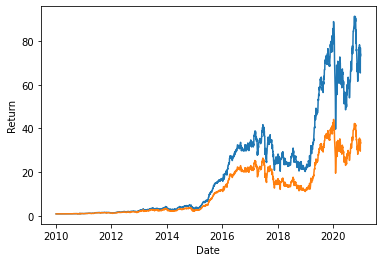

In [317]:
plt.plot(neutralized_return['net worth'])
plt.plot(neutralized_return_cost['net worth'])
plt.xlabel('Date')
plt.ylabel('Return')

### 3.3 Dynamic Volatility-Neutralization 

In [218]:
def bucketgenerator_rolling(df, window_size):
    volatility_list = df.pct_change().rolling(window_size).std().dropna().sort_values()*math.sqrt(252)
    #volatility_list = df.pct_change().std().dropna().sort_values()*math.sqrt(252)

    Bucket_size = int(volatility_list.shape[0]/5)

    Bucket_1 = df[volatility_list.index.values[:Bucket_size]]
    Bucket_2 = df[volatility_list.index.values[Bucket_size:2*Bucket_size]]
    Bucket_3 = df[volatility_list.index.values[2*Bucket_size:3*Bucket_size]]
    Bucket_4 = df[volatility_list.index.values[3*Bucket_size:4*Bucket_size]]
    Bucket_5 = df[volatility_list.index.values[4*Bucket_size:]]
    
    Bucket_1_signal = SW_signalgenerator(Bucket_1, 5, 22)
    Bucket_2_signal = SW_signalgenerator(Bucket_2, 5, 22)
    Bucket_3_signal = SW_signalgenerator(Bucket_3, 5, 22)
    Bucket_4_signal = SW_signalgenerator(Bucket_4, 5, 22)
    Bucket_5_signal = SW_signalgenerator(Bucket_5, 5, 22)
    
    Bucket_1_weight = risk_weight_adjustment(Bucket_1,Bucket_1_signal,120)
    Bucket_2_weight = risk_weight_adjustment(Bucket_2,Bucket_2_signal,120)
    Bucket_3_weight = risk_weight_adjustment(Bucket_3,Bucket_3_signal,120)
    Bucket_4_weight = risk_weight_adjustment(Bucket_4,Bucket_4_signal,120)
    Bucket_5_weight = risk_weight_adjustment(Bucket_5,Bucket_5_signal,120)
    
    final_return_table = pd.concat((Bucket_1_weight,Bucket_2_weight,Bucket_3_weight,Bucket_4_weight,Bucket_5_weight), axis = 1)
    return final_return_table

In [219]:
neutralized_return = backtest(df, bucketgenerator_rolling(df,120))

TypeError: sort_values() missing 1 required positional argument: 'by'